In [7]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### [MovieLens movie ratings dataset:](https://grouplens.org/datasets/movielens/100k/) 100,000 ratings from 1000 users on 1700 movies. 

In [8]:
data = pd.read_csv('Datasets/movies_full.csv', sep='\t', index_col=0)
data = data.iloc[0:100,]
data.head()

feature_cols = list(data)
y_vars = feature_cols[0]
del feature_cols[0]

,Star Wars (1977),Fargo (1996),Return of the Jedi (1983),Contact (1997),Raiders of the Lost Ark (1981),"Godfather, The (1972)","English Patient, The (1996)",Toy Story (1995),"Silence of the Lambs, The (1991)",Scream (1996),Pulp Fiction (1994),Air Force One (1997),"Empire Strikes Back, The (1980)",Liar Liar (1997),Twelve Monkeys (1995),Titanic (1997),Independence Day (ID4) (1996),Jerry Maguire (1996),"Rock, The (1996)","Fugitive, The (1993)"
User,,,,,,,,,,,,,,,,,,,,
450.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0
655.0,4.0,3.0,3.0,2.0,3.0,5.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,5.0
13.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,3.0,4.0,1.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,5.0,3.0,3.0
416.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0
276.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0


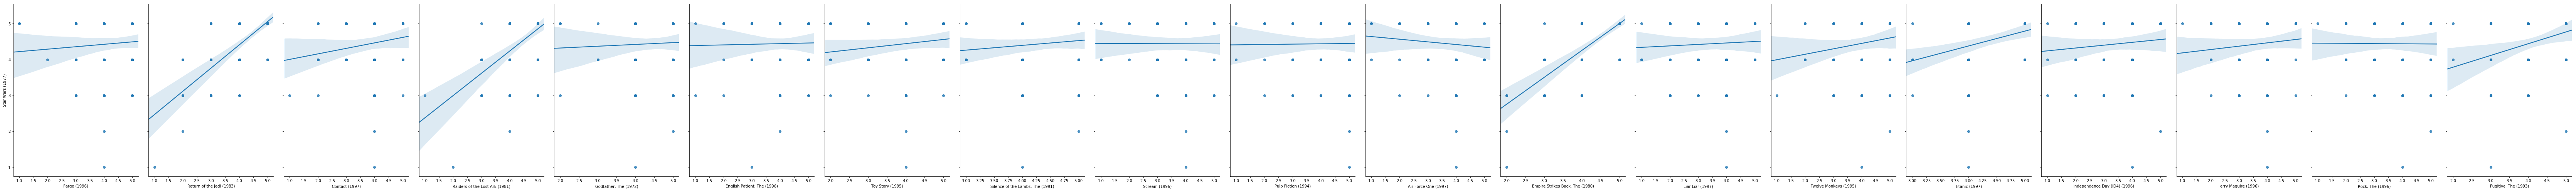

In [9]:
# Visualize the relationship between each movie and target movie
%matplotlib inline

sns.pairplot(data, x_vars=feature_cols, y_vars=y_vars, height=7, aspect=0.7, kind='reg')

### Preparing X and y using Pandas

In [10]:
# features matrix X
X = data[feature_cols]

# response vector y
y = data[y_vars]

# split X and y into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Linear regression with scikit-learn

In [11]:
linreg = LinearRegression()

# fit the model to the training data (learn coefficients)
linreg.fit(X_train, y_train)

# pair the features with the coefficients
zipped = list(zip(feature_cols, linreg.coef_))
zipped

# make predictions on the test set
y_pred = linreg.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[('Fargo (1996)', -0.02217681538565579),
 ('Return of the Jedi (1983)', 0.3676968700779947),
 ('Contact (1997)', -0.012975875231749673),
 ('Raiders of the Lost Ark (1981)', 0.19101933125237855),
 ('Godfather, The (1972)', 0.07435014449422557),
 ('English Patient, The (1996)', -0.025568744116621595),
 ('Toy Story (1995)', 0.04041777965426981),
 ('Silence of the Lambs, The (1991)', -0.2524584306319955),
 ('Scream (1996)', -0.048230836999590104),
 ('Pulp Fiction (1994)', 0.06079593136109358),
 ('Air Force One (1997)', 0.04276385720749138),
 ('Empire Strikes Back, The (1980)', 0.3976240316296061),
 ('Liar Liar (1997)', -0.10627996573004529),
 ('Twelve Monkeys (1995)', 0.047094835645094126),
 ('Titanic (1997)', 0.1721114211027),
 ('Independence Day (ID4) (1996)', -0.06615514661363504),
 ('Jerry Maguire (1996)', -0.04754611729564256),
 ('Rock, The (1996)', -0.09542787758526665),
 ('Fugitive, The (1993)', 0.007874971714431692)]

### Model Evaluation

In [12]:
# example true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [13]:
## Mean Absolute Error: the mean of the absolute value of errors

# MAE example by hand
print((10 + 0 + 20 + 10)/4)

# MAE example using sk-learn
print(metrics.mean_absolute_error(true, pred))

# Computing real MAE for our Sales predictions
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
0.4441623398505724


In [14]:
## Mean Squared Error: the mean of the squared errors

# MSE example by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# MSE example using sk-learn
print(metrics.mean_squared_error(true, pred))

# Computing real MSE for our Sales predictions
print(metrics.mean_squared_error(y_test, y_pred))

150.0
150.0
0.3512202956723693


In [15]:
## Root Mean Squared Error: the sqr. root of mean of the squared errors

# RMSE example by hand
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# RMSE example using sk-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

# Computing real RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
12.24744871391589
0.5926384189979328


* MAE: easiest to understand, it's the average error
* MSE: more popular than MAE because it "punishes" larger errors
* RMSE: even more popular than MSE because it's in "y" units